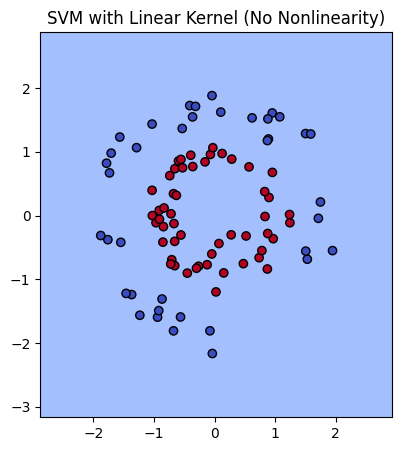

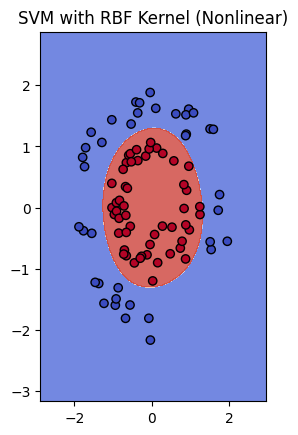

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset that is not linearly separable
X, y = datasets.make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Train an SVM with an RBF (Radial Basis Function) kernel (non-linear kernel)
svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X_train, y_train)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict the label for every point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# Plot decision boundary for SVM without kernel (linear)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_test, y_test, svm_linear, "SVM with Linear Kernel (No Nonlinearity)")

# Plot decision boundary for SVM with RBF kernel (nonlinear)
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, svm_rbf, "SVM with RBF Kernel (Nonlinear)")
